In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mnist import MNIST
import sys
from sklearn.metrics import accuracy_score

In [113]:
mndata = MNIST('C:\\Users\\Divya\\Google Drive\\Acads\\Courses-Winter2018\\CSE253-NeuralNetworks\\neuralnets253\\HW1')
mndata.gz = True
trainImages, trainLabels = mndata.load_training() #Images is a list of 60k images of 784 dimensions, Labels is a list of 60k ints
testImages, testLabels = mndata.load_testing() #testImages is a list of 10k images of 784 dimensions, testLabels is a list of 10k ints

In [114]:
validImages = (1/255)*np.array(trainImages[18000:20000])
validLabels = np.array(trainLabels[18000:20000])
trainImages = (1/255)*np.array(trainImages[:18000])
trainLabels = np.array(trainLabels[:18000])
testImages = (1/255)*np.array(testImages[-2000:])
testLabels = np.array(testLabels[-2000:])
validImages = np.insert(validImages, 0, 1, axis=1)
testImages = np.insert(testImages, 0, 1, axis=1)
trainImages = np.insert(trainImages, 0, 1, axis=1)

In [115]:
labelNums = len(set(trainLabels)) #total number of labels
dimensions = len(trainImages[0])
numSamples = len(trainImages)
print(labelNums)
print(dimensions)
print(numSamples)

10
785
18000


In [126]:
def predictProbability(wts, x): #wts: dims X labels, x = n X dims
    pred = np.matmul(x, wts)
    pred -= np.max(pred)
    pred = np.exp(pred)
    pred = (pred.T/np.sum(pred, axis=1)).T
    return pred

def getPredClass(wts, x):
    predProb = predictProbability(wts, x)
    predClass = np.argmax(predProb, axis=1)
    return predClass

def labelsToVectForm(labels):
    vectForm = np.zeros((len(labels), labelNums))
    for i in range(len(labels)):
        vectForm[i][labels[i]] = 1
    return vectForm
        
def costFunction(imgs, labels, wts, lamda, l1):
    sampLen = len(imgs)
    predProb = predictProbability(wts, imgs)
    vectorLabels = labelsToVectForm(labels)
    cost = lamda*np.sum(wts*wts)-1*(np.sum(vectorLabels*np.log(predProb)))/sampLen
    return cost

def gradientFunction(imgs, labels, wts, lamda, l1):
    sampLen = len(imgs)
    predProb = predictProbability(wts, imgs)
    vectorLabels = labelsToVectForm(labels)
    cost = lamda*np.sum(wts*wts)-((np.sum(vectorLabels*np.log(predProb)))/sampLen)
    gradient = 2*lamda*wts -(1/sampLen)*np.matmul(imgs.T, (vectorLabels-predProb))
    return cost, gradient

def getAccuracy(imgs, labels, wts):
    predClass = getPredClass(wts, imgs)
    return accuracy_score(labels, predClass)

def gradientDescent(lamda, learningRate, iterations, imgs, labels, l1, valImgs, valLbls, testImgs, testLbls):
    wts = np.zeros((len(imgs[0]), labelNums))
    cost = []
    tCost = []
    valCost = []
    trAcc = []
    tAcc = []
    valAcc = []
    minWts = wts
    minCos = sys.maxsize
    prevValCos = -sys.maxsize
    epoch = 0;
    minCostIter = 0 
    for i in range(iterations):
        
        cos, gradient = gradientFunction(imgs, labels, wts, lamda, l1)
        tCos = costFunction(testImgs, testLbls, wts, lamda, l1)
        valCos = costFunction(valImgs, valLbls, wts, lamda, l1)
        
        #print(cos)
        trAcc.append(getAccuracy(imgs, labels, wts))
        tAcc.append(getAccuracy(testImgs, testLbls, wts))
        valAcc.append(getAccuracy(valImgs, valLbls, wts))
        
        cost.append(cos)
        tCost.append(tCos)
        valCost.append(valCos)
        
        if(valCos<minCos):
            minWts = wts
            minCostIter = i;
        if(valCos>prevValCos):
            epoch+=1
            if(epoch>=3):
                print("Number of iterations: ", i)
                break
        else:
            epoch = 0
            
        prevValCos = valCos
            
        wts -= (learningRate*gradient)
        
    return cost, valCost, tCost, trAcc, tAcc, valAcc, minWts, minCostIter

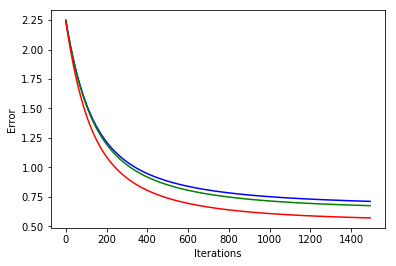

In [128]:
cost, valCost, tCost, trAcc, tAcc, valAcc, minWts, minCostIter = gradientDescent(0.01, 0.01, 1500, trainImages, trainLabels, True, validImages, validLabels, testImages, testLabels)

%matplotlib inline

plt.plot(cost[5:], label="Train", color='blue')
plt.plot(valCost[5:], label="Validation", color='green')
plt.plot(tCost[5:], label="Test", color='red')
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()

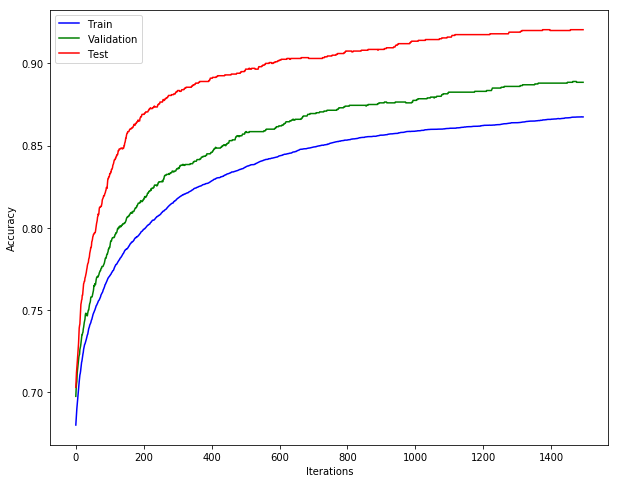

In [139]:
fig_size = [10, 8]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(trAcc[5:], label="Train", color='blue')
plt.plot(valAcc[5:], label="Validation", color='green')
plt.plot(tAcc[5:], label="Test", color='red')
plt.ylabel("Accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.show()

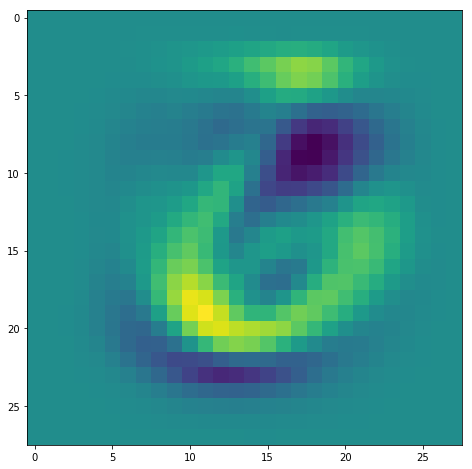

In [149]:
plt.imshow(scipy.reshape(minWts[1:,6],[28,28]))

Lamda:  0.1
Learning Rate:  0.01


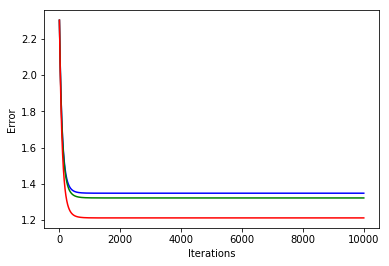

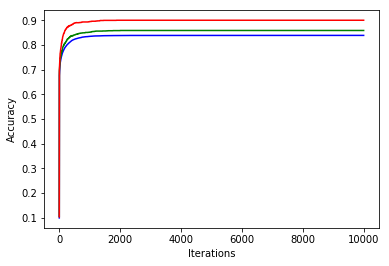

Lamda:  0.01
Learning Rate:  0.01


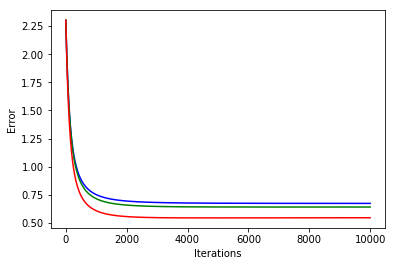

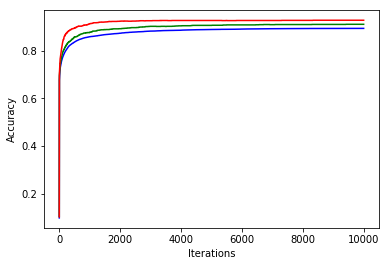

Lamda:  0.001
Learning Rate:  0.01


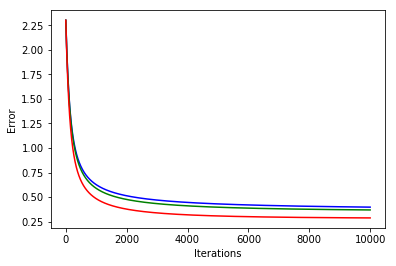

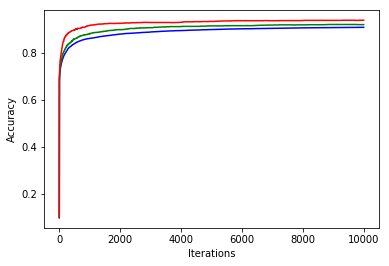

Lamda:  0.0001
Learning Rate:  0.01


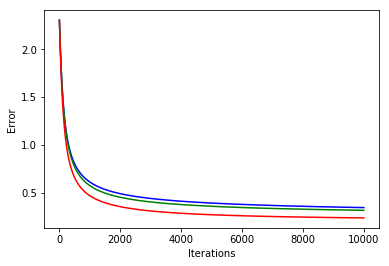

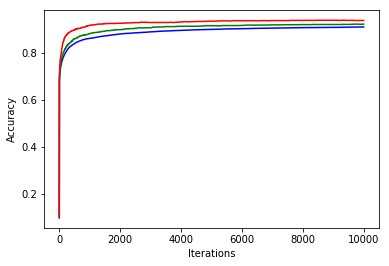

Lamda:  0.1
Learning Rate:  0.1


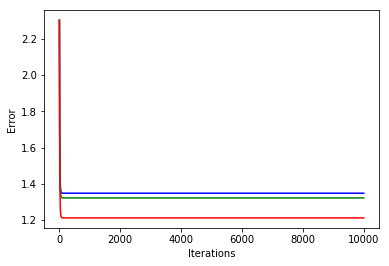

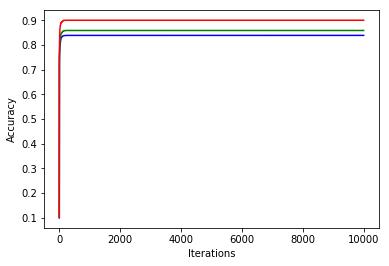

Lamda:  0.01
Learning Rate:  0.1


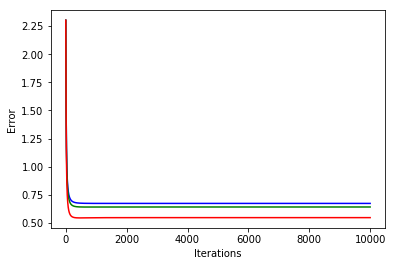

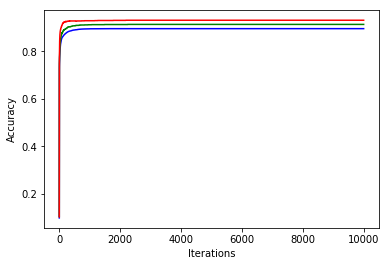

Lamda:  0.001
Learning Rate:  0.1


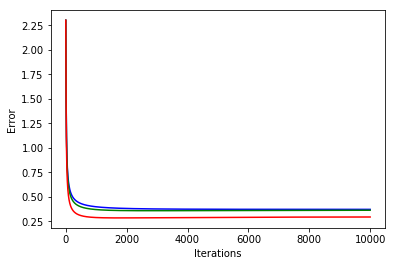

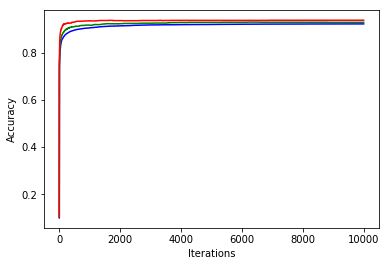

Lamda:  0.0001
Learning Rate:  0.1


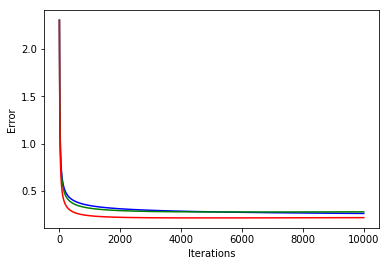

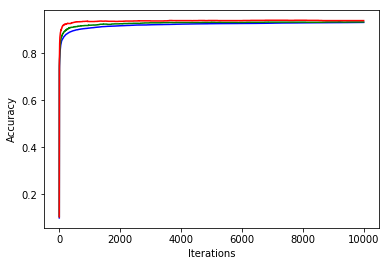

Lamda:  0.1
Learning Rate:  0.001


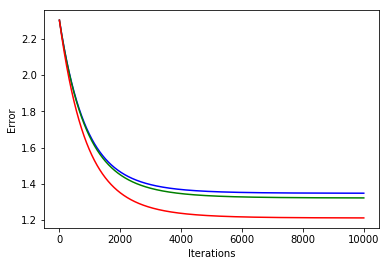

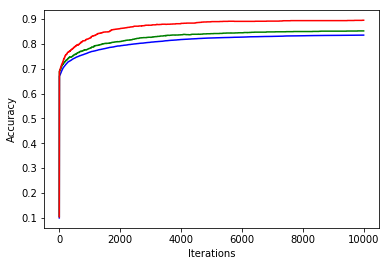

Lamda:  0.01
Learning Rate:  0.001


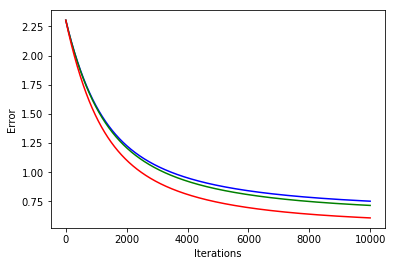

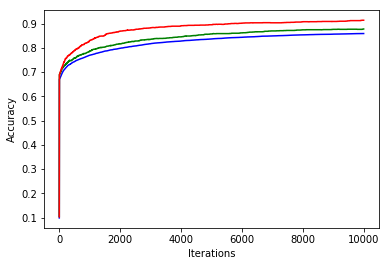

Lamda:  0.001
Learning Rate:  0.001


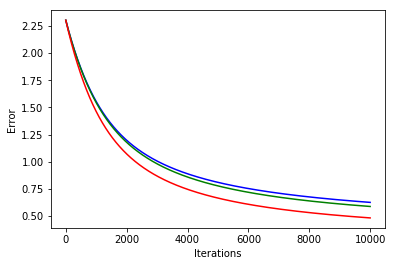

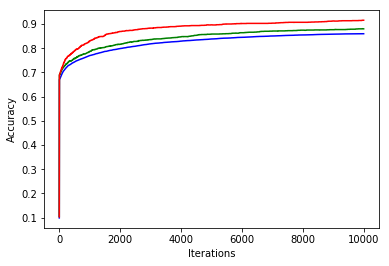

Lamda:  0.0001
Learning Rate:  0.001


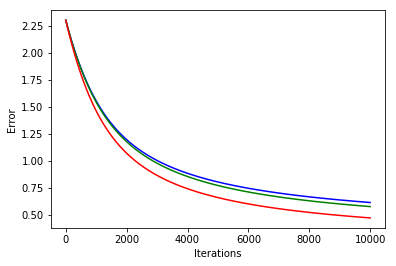

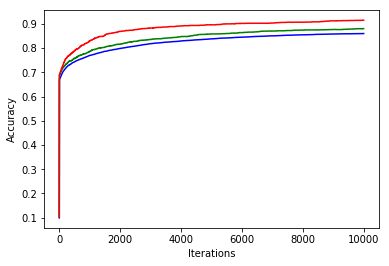

In [103]:
learningRates = [0.01, 0.1, 0.001]
lamdas = [0.1, 0.01, 0.001, 0.0001]
for lR in learningRates:
    for lam in lamdas:
        print("Lamda: ", lam)
        print("Learning Rate: ", lR)
        
        cost, valCost, tCost, trAcc, tAcc, valAcc, minWts, minCostIter = gradientDescent(lam, lR, 10000, trainImages, trainLabels, True, validImages, validLabels, testImages, testLabels)

        plt.plot(cost, label="Train", color='blue')
        plt.plot(valCost, label="Validation", color='green')
        plt.plot(tCost, label="Test", color='red')
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.show()
        
        plt.plot(trAcc, label="Train", color='blue')
        plt.plot(valAcc, label="Validation", color='green')
        plt.plot(tAcc, label="Test", color='red')
        plt.ylabel("Accuracy")
        plt.xlabel("Iterations")
        plt.show()

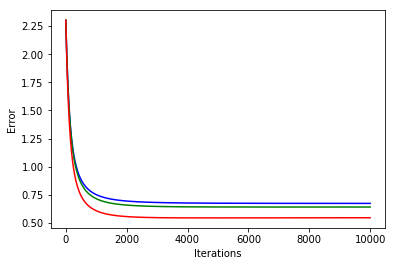

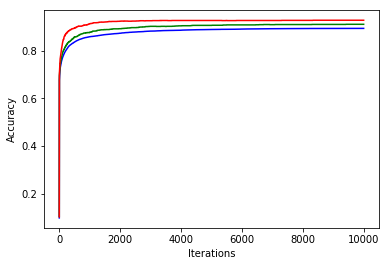

In [102]:
plt.plot(cost, label="Train", color='blue')
plt.plot(valCost, label="Validation", color='green')
plt.plot(tCost, label="Test", color='red')
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.show()
        
plt.plot(trAcc, label="Train", color='blue')
plt.plot(valAcc, label="Validation", color='green')
plt.plot(tAcc, label="Test", color='red')
plt.ylabel("Accuracy")
plt.xlabel("Iterations")
plt.show()

Lamda:  0.1
Learning Rate:  0.01
Number of iterations:  2442


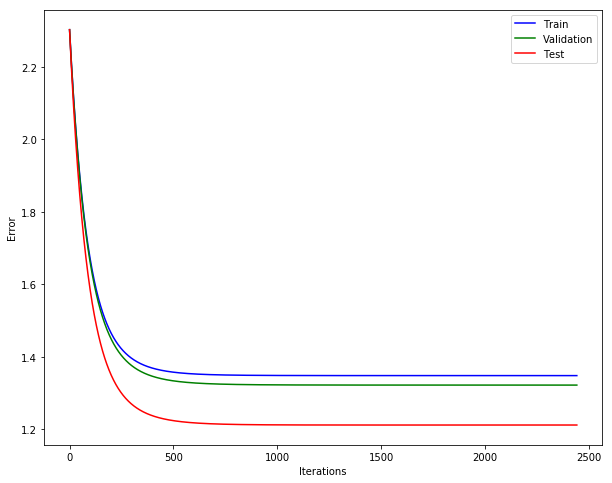

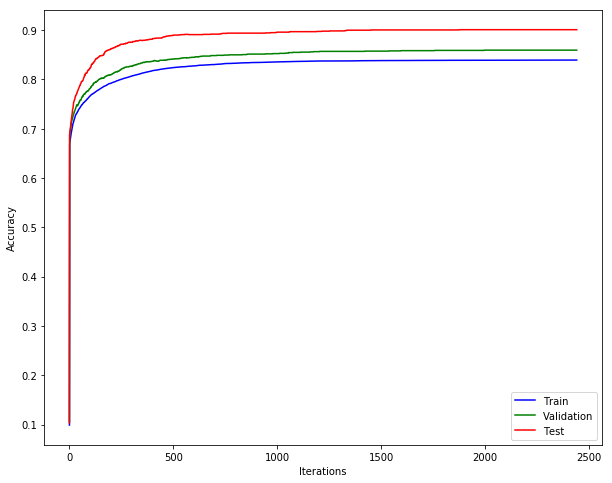

Lamda:  0.01
Learning Rate:  0.01
Number of iterations:  7277


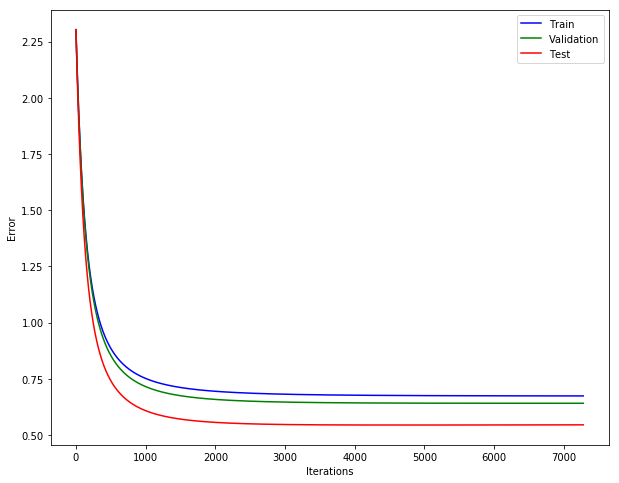

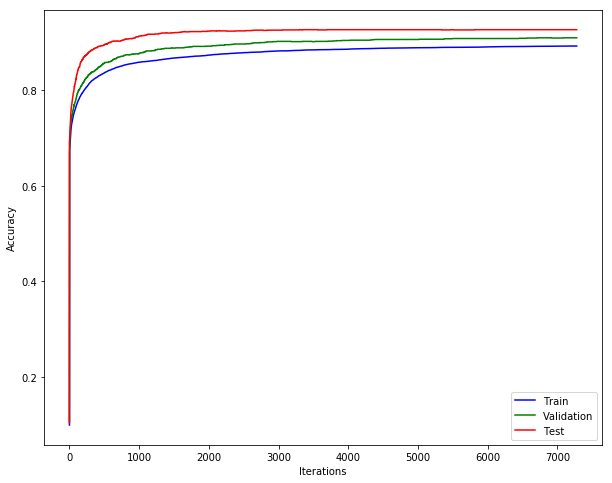

Lamda:  0.001
Learning Rate:  0.01


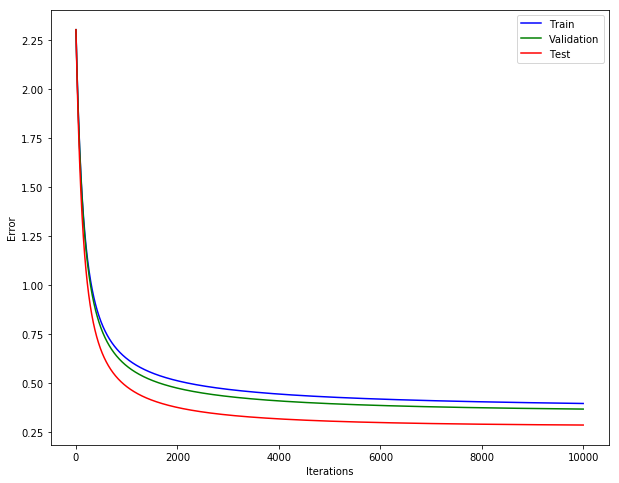

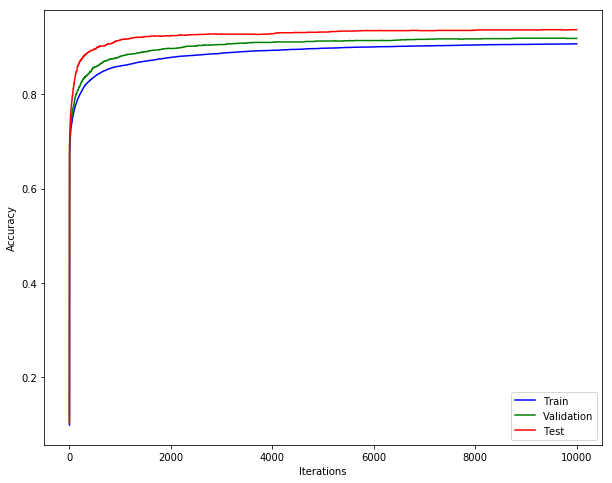

Lamda:  0.0001
Learning Rate:  0.01


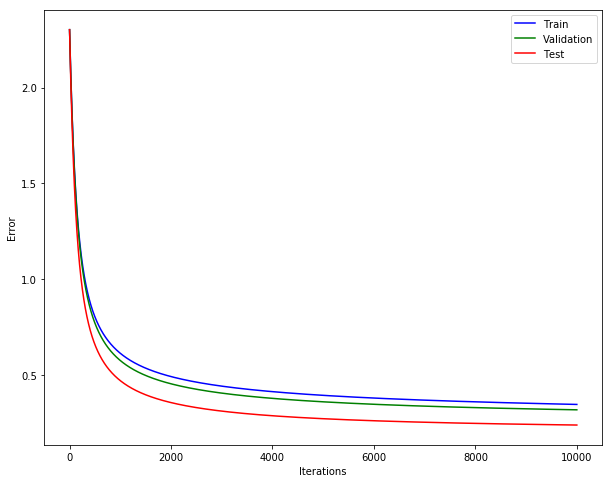

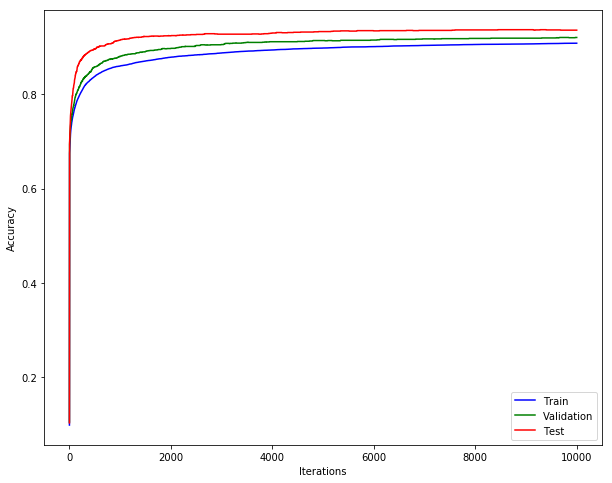

Lamda:  0.1
Learning Rate:  0.1
Number of iterations:  243


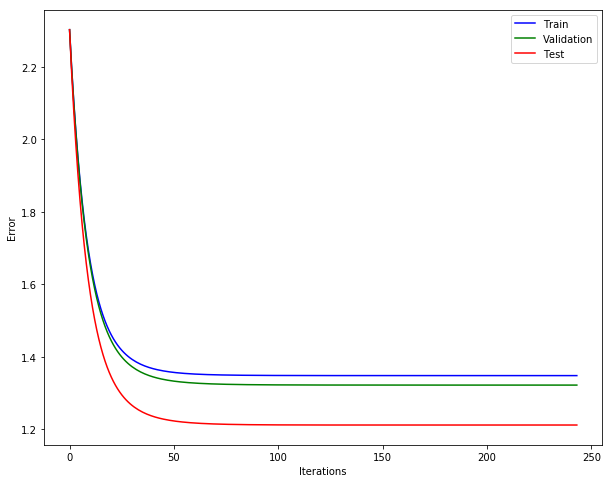

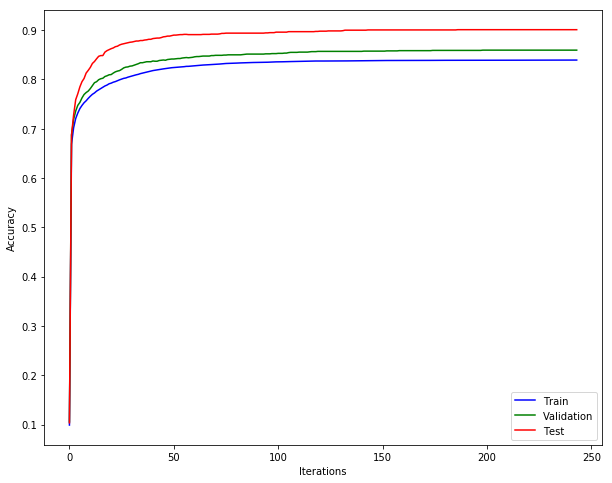

Lamda:  0.01
Learning Rate:  0.1
Number of iterations:  730


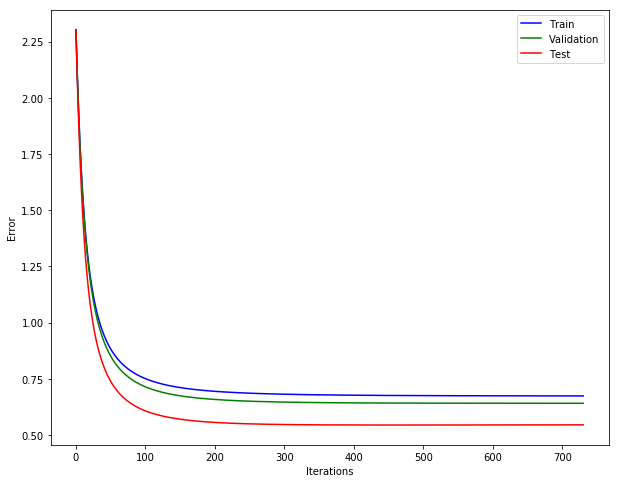

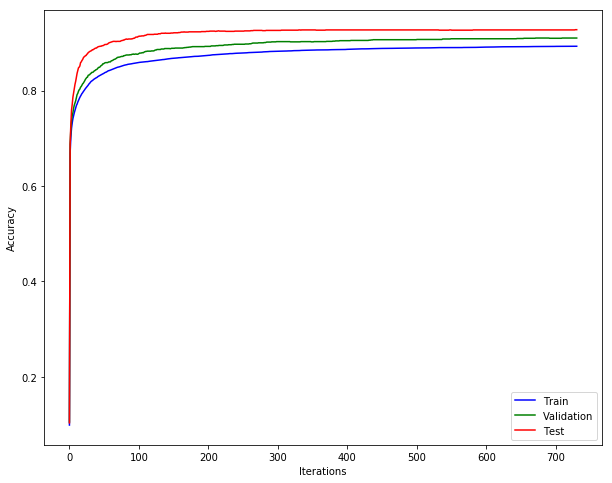

Lamda:  0.001
Learning Rate:  0.1
Number of iterations:  2780


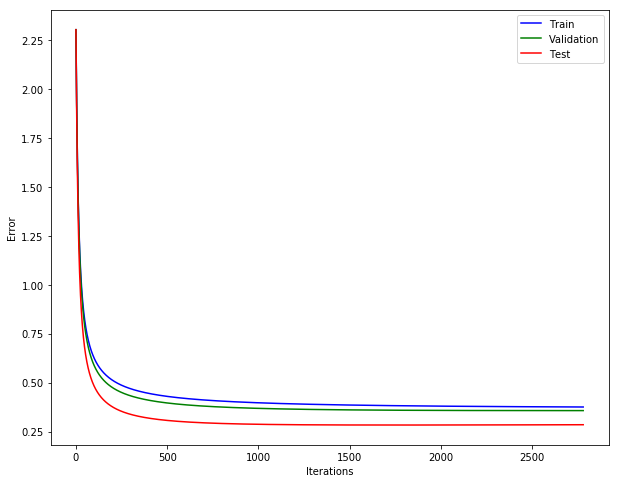

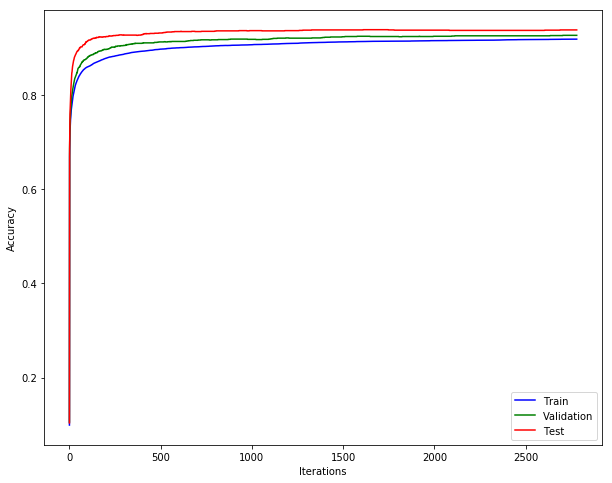

Lamda:  0.0001
Learning Rate:  0.1
Number of iterations:  6349


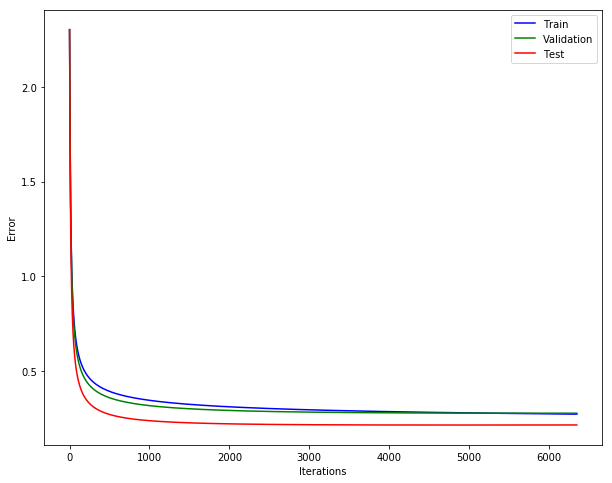

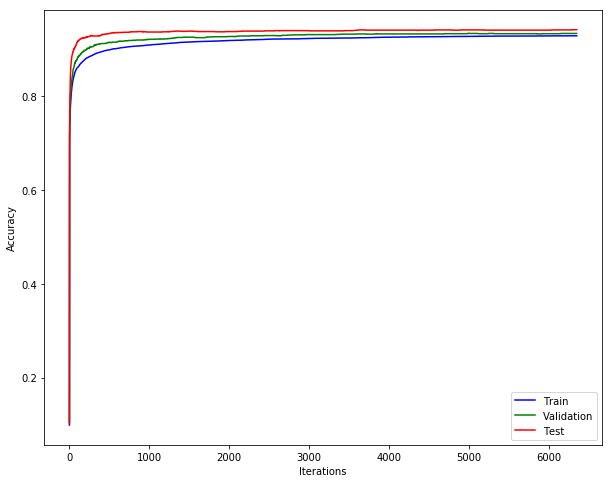

Lamda:  0.1
Learning Rate:  0.001


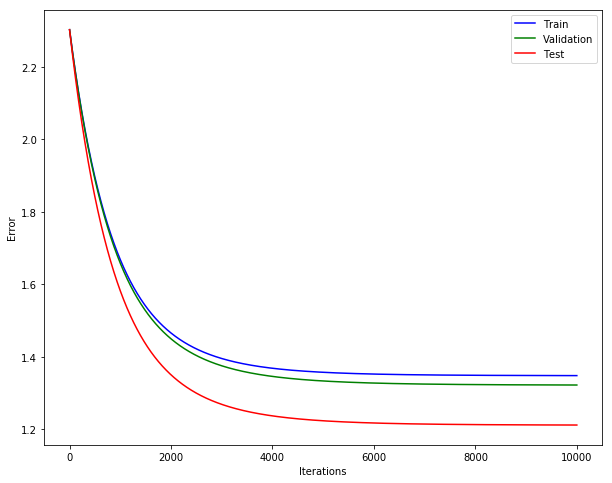

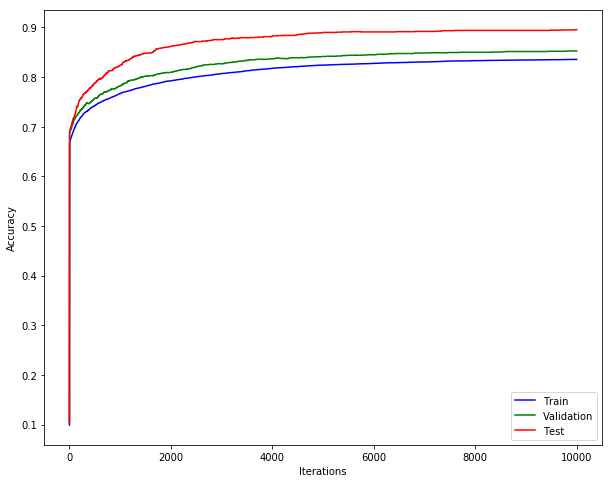

Lamda:  0.01
Learning Rate:  0.001


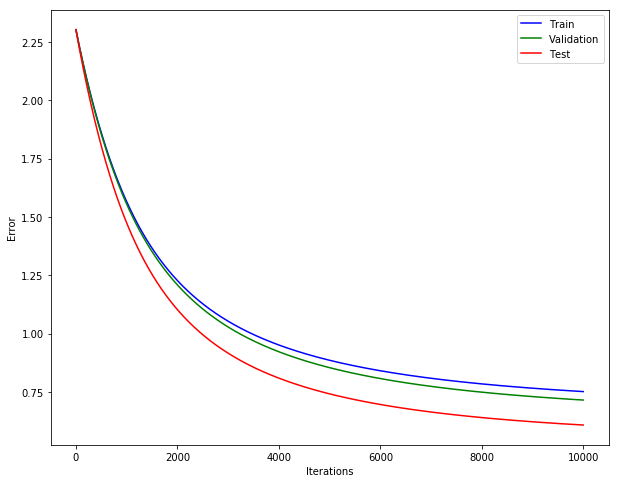

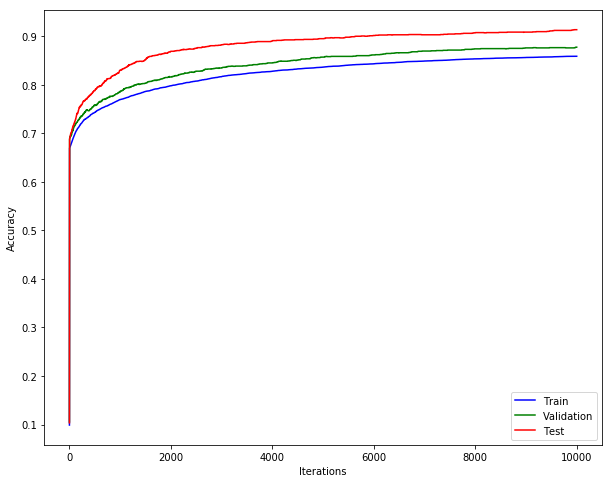

Lamda:  0.001
Learning Rate:  0.001


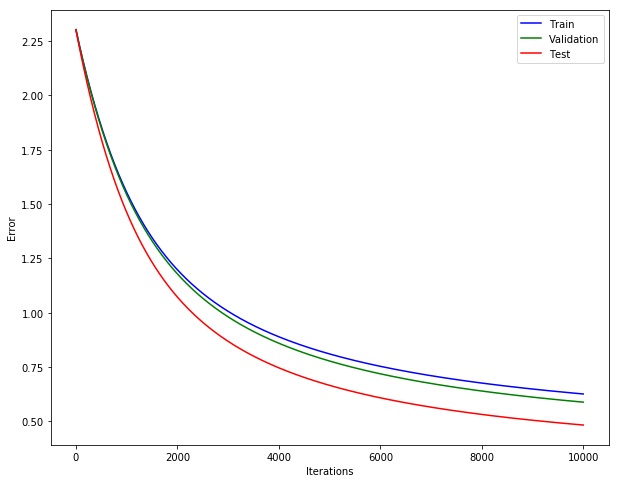

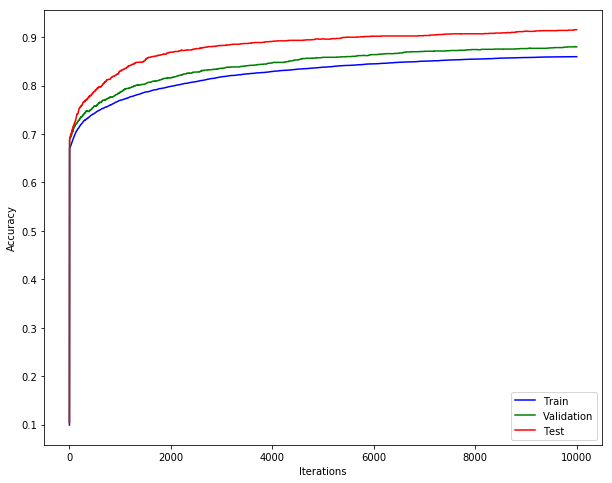

Lamda:  0.0001
Learning Rate:  0.001


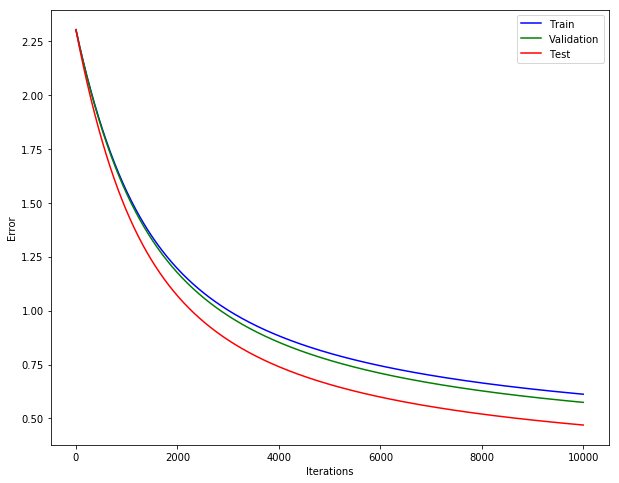

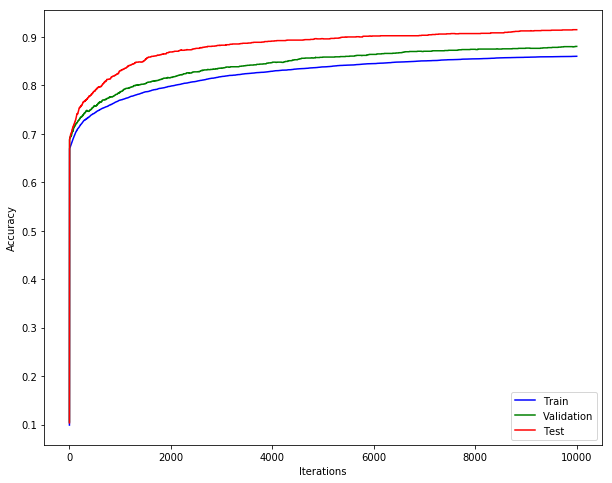

Minimum validation error:  0.276802448966
Lambda:  0.0001
Learning Rate:  0.1
[0.2719992453168571, 0.2768024489662107, 0.21488065591404706]
[0.92800000000000005, 0.94099999999999995, 0.93300000000000005]
----------------
0


ValueError: cannot reshape array of size 785 into shape (28,28)

In [151]:
# With early stopping
learningRates = [0.01, 0.1, 0.001]
lamdas = [0.1, 0.01, 0.001, 0.0001]
minLamda = 0.1
minLearningRate = 0.01
minErrWts = []
maxAccs = []
minErr = sys.maxsize
minErrs = []
for lR in learningRates:
    for lam in lamdas:
        print("Lamda: ", lam)
        print("Learning Rate: ", lR)
        
        cost, valCost, tCost, trAcc, tAcc, valAcc, minWts, minCostIter = gradientDescent(lam, lR, 10000, trainImages, trainLabels, True, validImages, validLabels, testImages, testLabels)
        
        if(valCost[minCostIter]<minErr):
            minErr = valCost[minCostIter]
            minErrs = [cost[minCostIter], valCost[minCostIter], tCost[minCostIter]]
            maxAccs = [trAcc[minCostIter], tAcc[minCostIter], valAcc[minCostIter]]
            minLamda = lam
            minLearningRate = lR
            minErrWts = minWts
            
        plt.plot(cost, label="Train", color='blue')
        plt.plot(valCost, label="Validation", color='green')
        plt.plot(tCost, label="Test", color='red')
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.legend()
        plt.show()
        
        plt.plot(trAcc, label="Train", color='blue')
        plt.plot(valAcc, label="Validation", color='green')
        plt.plot(tAcc, label="Test", color='red')
        plt.ylabel("Accuracy")
        plt.xlabel("Iterations")
        plt.legend()
        plt.show()
        
print("Minimum validation error: ", minErr)
print("Lambda: ",minLamda)
print("Learning Rate: ", minLearningRate)
print(minErrs)
print(maxAccs)
print("----------------")

fig_size = [6, 6]
plt.rcParams["figure.figsize"] = fig_size

for i in range(labelNums):
    print(i)
    plt.imshow(scipy.reshape(minErrWts[:,i],[28,28]))

Minimum validation error:  0.276802448966
Lambda:  0.0001
Learning Rate:  0.1
[0.2719992453168571, 0.2768024489662107, 0.21488065591404706]
[0.92800000000000005, 0.94099999999999995, 0.93300000000000005]
----------------
0


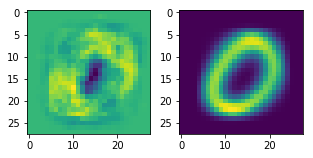

1


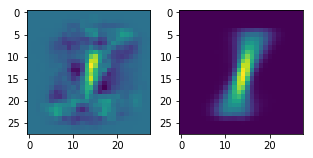

2


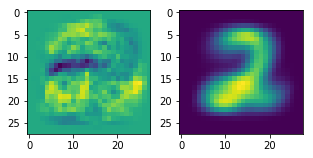

3


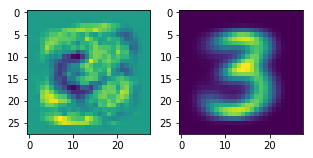

4


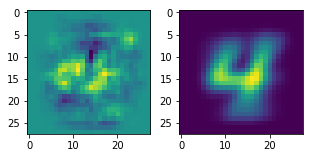

5


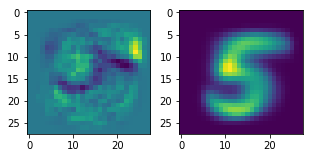

6


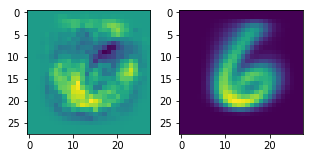

7


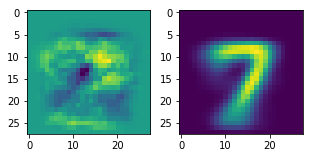

8


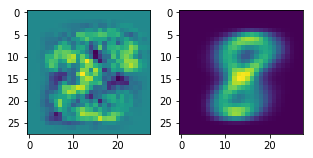

9


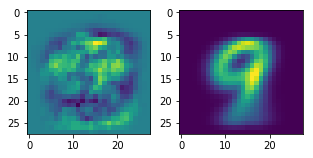

In [170]:
print("Minimum validation error: ", minErr)
print("Lambda: ",minLamda)
print("Learning Rate: ", minLearningRate)
print(minErrs)
print(maxAccs)
print("----------------")

fig_size = [5, 5]
plt.rcParams["figure.figsize"] = fig_size

'''for i in range(labelNums):
    print(i)
    plt.imshow(scipy.reshape(minErrWts[1:,i],[28,28]))
    plt.show()'''

avgImages = np.zeros((len(trainImages[0]), labelNums))
for i in range(len(trainImages)):
    avgImages[:,trainLabels[i]] += trainImages[i]
    
for i in range(labelNums):
    print(i)
    plt.figure(1)
    plt.subplot(221)
    plt.imshow(scipy.reshape(minErrWts[1:,i],[28,28]))
    plt.subplot(222)
    plt.imshow(scipy.reshape(avgImages[1:,i],[28,28]))
    plt.show()

0


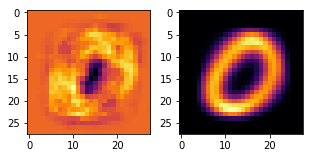

1


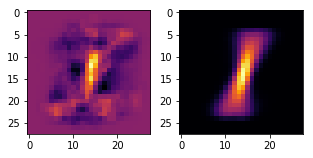

2


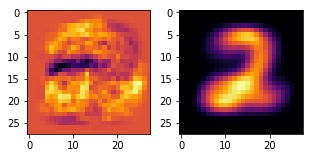

3


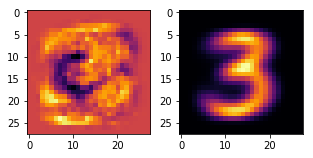

4


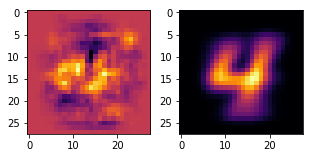

5


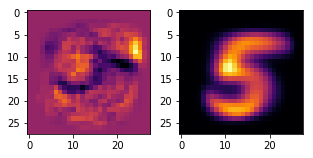

6


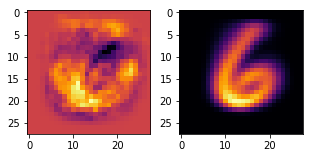

7


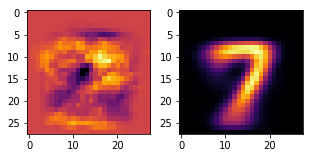

8


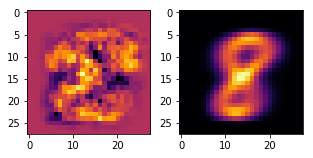

9


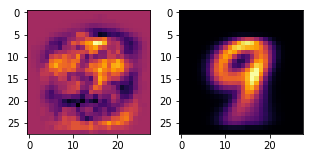

In [171]:
for i in range(labelNums):
    print(i)
    plt.figure(1)
    plt.subplot(221)
    plt.imshow(scipy.reshape(minErrWts[1:,i],[28,28]), cmap="inferno")
    plt.subplot(222)
    plt.imshow(scipy.reshape(avgImages[1:,i],[28,28]), cmap="inferno")
    plt.show()